C:\Users\bhima\AppData\Local\Temp\ipykernel_15716\1074452946.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)


Iteration 0: Cost = 0.6931
Iteration 100: Cost = 0.6522
Iteration 200: Cost = 0.6324
Iteration 300: Cost = 0.6216
Iteration 400: Cost = 0.6152
Iteration 500: Cost = 0.6111
Iteration 600: Cost = 0.6084
Iteration 700: Cost = 0.6065
Iteration 800: Cost = 0.6051
Iteration 900: Cost = 0.6042


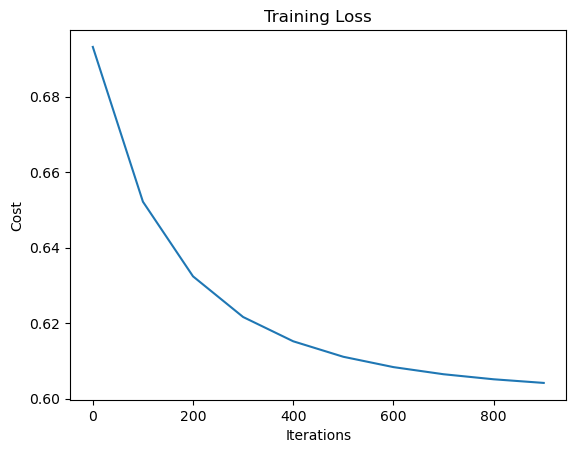

Train Accuracy: 68.03%
Test Accuracy: 68.44%


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load and preprocess the dataset
df = pd.read_csv("hr_job.csv")
df.fillna(method="bfill", inplace=True)

# Drop non-numeric or irrelevant columns
if 'city' in df.columns:
    df.drop('city', axis=1, inplace=True)

# Separate features and target
X = df.drop('target', axis=1).values
Y = df['target'].values.reshape(-1, 1)

# 2. Feature scaling
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

# 3. Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.75, random_state=42)

# 4. Sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 5. Initialize weights
def initialize_weights(dim):
    W = np.zeros((dim, 1))
    b = 0.0
    return W, b

# 6. Forward pass
def forward(X, W, b):
    Z = np.dot(X, W) + b
    A = sigmoid(Z)
    return A

# 7. Compute cost
def compute_cost(A, Y):
    m = Y.shape[0]
    cost = -np.sum(Y * np.log(A + 1e-8) + (1 - Y) * np.log(1 - A + 1e-8)) / m
    return cost

# 8. Backward pass
def backward(X, A, Y):
    m = X.shape[0]
    dW = np.dot(X.T, (A - Y)) / m
    db = np.sum(A - Y) / m
    return dW, db

# 9. Training loop
def train(X, Y, learning_rate=0.01, iterations=1000):
    W, b = initialize_weights(X.shape[1])
    cost_history = []

    for i in range(iterations):
        A = forward(X, W, b)
        cost = compute_cost(A, Y)
        dW, db = backward(X, A, Y)

        W -= learning_rate * dW
        b -= learning_rate * db

        if i % 100 == 0:
            cost_history.append(cost)
            print(f"Iteration {i}: Cost = {cost:.4f}")

    # Plot cost over time
    plt.plot(np.arange(0, iterations, 100), cost_history)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Training Loss")
    plt.show()

    return W, b

# 10. Prediction
def predict(X, W, b):
    A = forward(X, W, b)
    return (A > 0.5).astype(int)

# 11. Accuracy
def accuracy(Y_pred, Y_true):
    return np.mean(Y_pred == Y_true) * 100

# Train and evaluate
W, b = train(x_train, y_train, learning_rate=0.01, iterations=1000)
y_pred_train = predict(x_train, W, b)
y_pred_test = predict(x_test, W, b)

print(f"Train Accuracy: {accuracy(y_pred_train, y_train):.2f}%")
print(f"Test Accuracy: {accuracy(y_pred_test, y_test):.2f}%")